/home/hmcgrat/miniconda3/envs/LNC_ENV/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


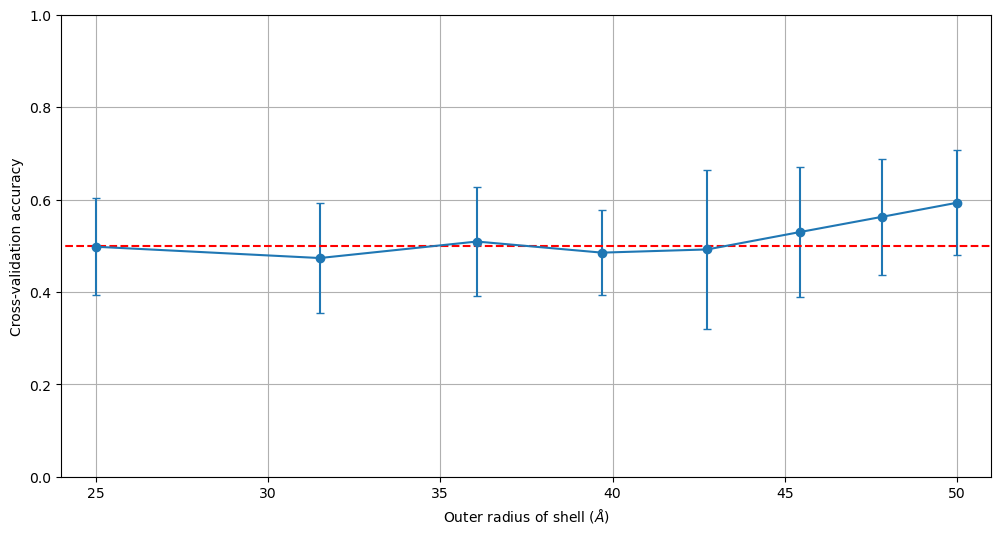

In [1]:
import shared_data as sd
from glob import glob
import utility_functions as uf
import matplotlib.pyplot as plt
import numpy as np


def get_sorting_key(result_file_path):
    return int(result_file_path.split("_")[-1].strip(".npy"))

RESULTS = sd.RESULTS
pair_name = "LNC_NONE"
accuracy_mean_list = []
accuracy_sem_list = []
labels = []
result_path_list = []
for result_path in glob(f"{RESULTS}/*{pair_name}*passthrough*validation*"):
    result_path_list.append(result_path)
result_path_list = sorted(result_path_list, key=get_sorting_key)
for result_path in result_path_list:
    cf = uf.get_config_file_from_file_path(result_path)
    accuracy_mean, accuracy_sem = uf.get_accuracy_mean_and_sem(result_path)
    selection_name = cf.sel_name
    accuracy_mean_list.append(accuracy_mean)
    accuracy_sem_list.append(accuracy_sem * np.sqrt(sd.N_CROSS_VALIDATION_COMBINATIONS))
    labels.append(selection_name)
x = sd.R[1:]
plt.figure(figsize=(12, 6))
plt.errorbar(x, accuracy_mean_list, yerr=accuracy_sem_list, capsize=3, marker="o")
plt.plot([20, 55], [0.5, 0.5], color="red", linestyle="--")
# plt.xticks(x, labels, rotation=70, ha="right")
plt.ylim((0, 1))
plt.xlim((24, 51))
plt.ylabel("Cross-validation accuracy")
plt.xlabel("Outer radius of shell ($\AA$)")
plt.grid()